<a href="https://colab.research.google.com/github/hellfireworld/MachineLearning/blob/master/digit_recognizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Alexandros_Tsevrenis_MTN1914***

# **Import essential libraries**

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
import io
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import IPython
from IPython.display import Image
import pydotplus

#pytorch utility imports
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
#neural net imports
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

# **Import day.csv file with GOOGLE_COLAB**

In [0]:
from google.colab import files

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [0]:
file_train = r'/gdrive/My Drive/datasets/digit_recognizer_dataset_train.csv'
file_test = r'/gdrive/My Drive/datasets/digit_recognizer_dataset_test.csv'

In [0]:
df = pd.read_csv(file_train)
df2 = pd.read_csv(file_test)
print(df)
print(df2)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
27995      6       0       0       0  ...         0         0         0         0
27996      0       0       0       0  ...         0         0         0         0
27997      8       0       0       0  ...         0         0         0         0
27998      0       0       0       0  ...         0         0         0         0
27999      7       0       0       0  ...         0         0         0         0

[28000 rows x 7

# **Read the dataset from the CSV file**

**Define df variable as day.csv using pandas library.
Read separated values (csv) file into DataFrame.**

In [0]:
df = pd.read_csv(io.StringIO(uploaded['digit_recognizer_dataset.csv'].decode('utf-8')))

# **Print the shape of our whole data (rows, columns)**

In [0]:
print(df.shape)


(42000, 785)


# **Firstly, split the pixelX features from the first column and store them in X, secondly store the first column as the prediction feature/variable as y**

In [0]:
X = df.iloc[:, 1:]
y = df['label']

# **Plot Digit Three from dataset**

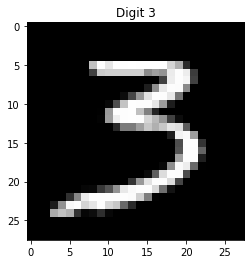

In [0]:
#three
three = df.iloc[25, 1:]
#print(three.shape)
three = three.values.reshape(28, 28)
plt.imshow(three, cmap='gray')
plt.title("Digit 3")
plt.show()

loop


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


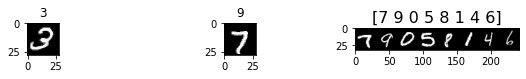

Net(
  (conv_block): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_block): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=6272, out_features=128, bias=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Train Epoch: 0 [1600/22400 (7%)]	Loss: 0.831007
Train Epoch: 0 [3200/22400 (14%)]	Loss: 0.552067
Train Epoch: 0 [4800/22400 (21%)]	Loss: 0.348447
Train Epoch: 0 [6400/22400 (29%)]	Loss: 0.484707
Train Epoch: 0 [8000/22400 (36%)]	Loss: 0.366096
Train Epoch: 0 [9600/22400 (43%)]	Loss: 0.181640
Train Epoch: 0 [11200/22400 (50%)]	Loss: 0.418830
Train Epoch: 0 [12800/22400 (57%)]	Loss: 0.102713
Train Epoch: 0 [14400/22400 (64%)]	Loss: 0.309450
Train Epoch: 0 [16000/22400 (71%)]	Loss: 0.929435
Train Epoch: 0 [17600/22400 (79%)]	Loss: 0.089448
Train Epoch: 0 [19200/22400 (86%)]	Loss: 1.288905
Train Epoch: 0 [20800/22400 (93%)]	Loss: 0.377212
Train Epoch: 0 [22400/22400 (100%)]	Loss: 0.149497


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Average Val Loss: 0.0703, Val Accuracy: 5475/5600 (97.768%)

Train Epoch: 1 [1600/22400 (7%)]	Loss: 0.303034
Train Epoch: 1 [3200/22400 (14%)]	Loss: 0.465056
Train Epoch: 1 [4800/22400 (21%)]	Loss: 0.176357
Train Epoch: 1 [6400/22400 (29%)]	Loss: 0.037825
Train Epoch: 1 [8000/22400 (36%)]	Loss: 0.226241
Train Epoch: 1 [9600/22400 (43%)]	Loss: 0.057874
Train Epoch: 1 [11200/22400 (50%)]	Loss: 0.178591
Train Epoch: 1 [12800/22400 (57%)]	Loss: 0.139840
Train Epoch: 1 [14400/22400 (64%)]	Loss: 0.083368
Train Epoch: 1 [16000/22400 (71%)]	Loss: 0.088172
Train Epoch: 1 [17600/22400 (79%)]	Loss: 0.077741
Train Epoch: 1 [19200/22400 (86%)]	Loss: 0.432149
Train Epoch: 1 [20800/22400 (93%)]	Loss: 0.162841
Train Epoch: 1 [22400/22400 (100%)]	Loss: 0.026503

Average Val Loss: 0.0552, Val Accuracy: 5508/5600 (98.357%)

Train Epoch: 2 [1600/22400 (7%)]	Loss: 0.048504
Train Epoch: 2 [3200/22400 (14%)]	Loss: 0.227547
Train Epoch: 2 [4800/22400 (21%)]	Loss: 0.078484
Train Epoch: 2 [6400/22400 (29%)]	Lo

In [0]:
if __name__ == '__main__':
    # stops the freeze error
    torch.multiprocessing.freeze_support()
    print('loop')

    # GPU CUDA
    # check cuda version
    #print(torch.cuda.is_available())
    #print(torch.backends.cudnn.enabled)
    #if torch.cuda.is_available():
    #    device = torch.device('cuda')
    #print(device)

    train_df = df
    test_df = df2
    #train_df = df.iloc[:28000, :]
    #test_df = df.iloc[28000:, :]

    train_labels = train_df['label'].values
    train_images = (train_df.iloc[:, 1:].values).astype('float32')
    test_images = (test_df.iloc[:, :].values).astype('float32')

    # Training and Validation Split
    train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels,
                                                                          stratify=train_labels, random_state=123,
                                                                          test_size=0.20)
    train_images = train_images.reshape(train_images.shape[0], 28, 28)
    val_images = val_images.reshape(val_images.shape[0], 28, 28)
    test_images = test_images.reshape(test_images.shape[0], 28, 28)

    # train samples
    for i in range(6, 9):
        plt.subplot(330 + (i + 1))
        plt.imshow(train_images[i].squeeze(), cmap=plt.get_cmap('gray'))
        plt.title(train_labels[i])

    # test samples
    for i in range(6, 9):
        plt.subplot(330 + (i + 1))
        plt.imshow(test_images[i].squeeze(), cmap=plt.get_cmap('gray'))


    # train
    train_images_tensor = torch.tensor(train_images) / 255.0
    train_labels_tensor = torch.tensor(train_labels)
    train_tensor = TensorDataset(train_images_tensor, train_labels_tensor)

    # val
    val_images_tensor = torch.tensor(val_images) / 255.0
    val_labels_tensor = torch.tensor(val_labels)
    val_tensor = TensorDataset(val_images_tensor, val_labels_tensor)

    # test
    test_images_tensor = torch.tensor(test_images) / 255.0

    train_loader = DataLoader(train_tensor, batch_size=16, num_workers=2, shuffle=True)
    val_loader = DataLoader(val_tensor, batch_size=16, num_workers=2, shuffle=True)
    test_loader = DataLoader(test_images_tensor, batch_size=16, num_workers=2, shuffle=False)

    for batch_idx, (data, target) in enumerate(train_loader):
        img_grid = make_grid(data[0:8, ].unsqueeze(1), nrow=8)
        img_target_labels = target[0:8, ].numpy()
        break

    plt.imshow(img_grid.numpy().transpose((1, 2, 0)))
    plt.rcParams['figure.figsize'] = (10, 2)
    plt.title(img_target_labels, size=16)
    plt.show()



    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()

            self.conv_block = nn.Sequential(
                nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(32),
                nn.ReLU(inplace=True),
                nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(64),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(128),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2, stride=2)
            )

            self.linear_block = nn.Sequential(
                nn.Dropout(p=0.5),
                nn.Linear(128 * 7 * 7, 128),
                nn.BatchNorm1d(128),
                nn.ReLU(inplace=True),
                nn.Dropout(0.5),
                nn.Linear(128, 64),
                nn.BatchNorm1d(64),
                nn.ReLU(inplace=True),
                nn.Dropout(0.5),
                nn.Linear(64, 10)
            )

        def forward(self, x):
            x = self.conv_block(x)
            x = x.view(x.size(0), -1)
            x = self.linear_block(x)

            return x

    conv_model = Net()
    print(conv_model)

    optimizer = optim.Adam(params=conv_model.parameters(), lr=0.003)
    criterion = nn.CrossEntropyLoss()

    exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    # GPU CUDA
    #if torch.cuda.is_available():
    #    conv_model = conv_model.cuda()
    #    criterion = criterion.cuda()


    def train_model(num_epoch):
        conv_model.train()
        exp_lr_scheduler.step()

        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.unsqueeze(1)
            data, target = data, target

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()
            #    target = target.cuda()

            optimizer.zero_grad()
            output = conv_model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            if( (batch_idx + 1) % 100 == 0 ):
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    num_epoch, (batch_idx + 1) * len(data), len(train_loader.dataset),
                               100. * (batch_idx + 1) / len(train_loader), loss.data))


    def evaluate(data_loader):
        conv_model.eval()
        loss = 0
        correct = 0

        for data, target in data_loader:
            data = data.unsqueeze(1)
            data, target = data, target

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()
            #    target = target.cuda()

            output = conv_model(data)

            loss += F.cross_entropy(output, target, size_average=False).data

            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()

        loss /= len(data_loader.dataset)

        print('\nAverage Val Loss: {:.4f}, Val Accuracy: {}/{} ({:.3f}%)\n'.format(loss, correct, len(data_loader.dataset),
                                                                                   100. * correct / len(data_loader.dataset)))

    num_epochs = 25

    for n in range(num_epochs):
        train_model(n)
        evaluate(val_loader)

    def make_predictions(data_loader):
        conv_model.eval()
        test_preds = torch.LongTensor()

        for i, data in enumerate(data_loader):
            data = data.unsqueeze(1)

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()

            output = conv_model(data)

            preds = output.cpu().data.max(1, keepdim=True)[1]
            test_preds = torch.cat((test_preds, preds), dim=0)

        return test_preds

    test_set_preds = make_predictions(test_loader)



